In [1]:
#install Seaborn package. Comment after running once.
!pip install seaborn
!pip install statsmodels
!pip install -q datascience                                       
!pip install -q pandas-profiling
print('Installed...')

Installed...


In [2]:
# 1. Import Dependencies
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import math
import warnings
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
import seaborn as sns                                             
%matplotlib inline
sns.set()
import datetime
from subprocess import check_output
import scipy as sp 
from scipy import stats
from scipy.stats import norm

In [3]:
# 2. Load data

AirC_train = pd.DataFrame(pd.read_csv('beijing_train.csv',index_col = 0))        # Air Quality data for training is loaded
AirC_test = pd.DataFrame(pd.read_csv('beijing_test.csv',index_col = 0 ) )   # Air Quality data for testing is loaded

In [4]:
# 3. Check the head of the data (first few rows)
AirC_train.head()


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
REF_NO,,,,,,,,,,,,,,,,,
1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [5]:
# 3a. Check the head of the data (first few rows)
AirC_test.head()

,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
REF_NO,,,,,,,,,,,,,,,,
33649,2017,1,1,0,496.0,8.0,121.0,6100.0,4.0,-4.7,1022.1,-6.1,0.0,ENE,1.0,Aotizhongxin
33650,2017,1,1,1,497.0,7.0,113.0,6300.0,4.0,-5.2,1022.3,-6.4,0.0,E,0.7,Aotizhongxin
33651,2017,1,1,2,469.0,7.0,111.0,6200.0,4.0,-5.4,1022.5,-6.5,0.0,ENE,1.1,Aotizhongxin
33652,2017,1,1,3,425.0,6.0,109.0,5900.0,3.0,-5.2,1022.5,-6.2,0.0,E,1.1,Aotizhongxin
33653,2017,1,1,4,468.0,10.0,123.0,7700.0,16.0,-5.0,1021.9,-5.8,0.0,ENE,1.0,Aotizhongxin


**Observations**

- looks like year, month,day, hour all can be combined, monthly means probably



Column Name	                                          --     Description
- REF_NO	                                         -- Index of rows
- year	                                            -- Contains the year in which the data was Recorded
- month	                                           -- Contains the month of the year in which the data was Recorded
- day	                                             --   Contains the day of the month in which the data was Recorded
- hour	                                            --Contains at what hour of the day the data was Recorded
- PM2.5	                                         -- Atmospheric particulate matter (PM) that have a diameter less than 2.5 μms
- PM10	                                         --   Atmospheric particulate matter (PM) that have a diameter less than 10 μms
- SO2	                                            --    SO2 concentration (ug/m^3)
- NO2	                                             --   NO2 concentration (ug/m^3)
- CO	                                             --   CO concentration (ug/m^3)
- O3	                                             --   Ozone concentration (ug/m^3)
- Temp	                                            -- temperature (degree Celsius)
- PRES	                                           --  pressure (hPa)
- DEWP	                                           -- dew point temperature (degree Celsius)
- RAIN	                                          --  RAIN in (mm)
- wd	                                           --     wind direction
- WSPM	                                           -- wind speed (m/s)
- station	                                         --   name of the air-quality monitoring site


In [6]:
# 4. Check for info
AirC_train.info(verbose = True, memory_usage = 'deep', show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403776 entries, 1 to 33648
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     403776 non-null  int64  
 1   month    403776 non-null  int64  
 2   day      403776 non-null  int64  
 3   hour     403776 non-null  int64  
 4   PM2.5    395301 non-null  float64
 5   PM10     397554 non-null  float64
 6   SO2      395000 non-null  float64
 7   NO2      391917 non-null  float64
 8   CO       383515 non-null  float64
 9   O3       390769 non-null  float64
 10  TEMP     403512 non-null  float64
 11  PRES     403511 non-null  float64
 12  DEWP     403507 non-null  float64
 13  RAIN     403515 non-null  float64
 14  wd       402387 non-null  object 
 15  WSPM     403538 non-null  float64
 16  station  403776 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 97.3 MB


In [7]:
# 5. Check for missing values
display(AirC_train.isnull().sum())
display(AirC_test.isnull().any())
print(AirC_train.shape)
print(AirC_test.shape)

year           0
month          0
day            0
hour           0
PM2.5       8475
PM10        6222
SO2         8776
NO2        11859
CO         20261
O3         13007
TEMP         264
PRES         265
DEWP         269
RAIN         261
wd          1389
WSPM         238
station        0
dtype: int64

year       False
month      False
day        False
hour       False
PM10       False
SO2        False
NO2        False
CO         False
O3         False
TEMP       False
PRES       False
DEWP       False
RAIN       False
wd         False
WSPM       False
station    False
dtype: bool

(403776, 17)
(16728, 16)


<AxesSubplot:ylabel='REF_NO'>

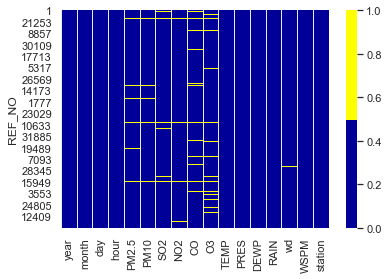

In [8]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(AirC_train.isnull(), cmap=sns.color_palette(colours))

**Observations**
- PM2.5 is missing in test data
- Many missing in PM2.5, has 8475 (2.1%) Nan in train data set, infact, missing values in y variable, only option is to drop rows   	
- PM10 has 6222 (1.5%) missing values	
- SO2 has 8776 (2.2%) missing values	
- NO2 has 11859 (2.9%) missing values	
- CO has 20261 (5.0%) missing values, quite high 	
- O3 has 13007 (3.2%) missing values
- lets check for skew and plan missing value strategy

- RAIN is highly skewed (γ1 = 29.4402448),  RAIN has 387119 (95.9%) zeros	**YES**, drop it off 
- hour has 16824 (4.2%) zeros	
- WSPM has 10891 (2.7%) zeros	

In [9]:
# 6. Summary Statistics
AirC_train.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,403776.000000,403776.000000,403776.000000,403776.000000,395301.000000,397554.000000,395000.000000,391917.000000,383515.000000,390769.000000,403512.000000,403511.000000,403507.000000,403515.000000,403538.000000
mean,2014.564194,6.735378,15.748217,11.500000,79.248275,104.327897,15.733060,50.352785,1214.843339,58.119327,14.088899,1010.282534,3.157291,0.067052,1.718380
std,1.097503,3.356479,8.808891,6.922195,79.146708,90.136400,21.739455,34.771910,1124.285676,57.375966,11.303534,10.356778,13.617273,0.837845,1.237965
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,2.000000,23.000000,500.000000,11.000000,4.000000,1002.000000,-8.000000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,83.000000,7.000000,43.000000,900.000000,45.000000,15.400000,1009.800000,4.200000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,110.000000,145.000000,19.000000,71.000000,1500.000000,83.000000,23.500000,1018.300000,15.500000,0.000000,2.200000
max,2016.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [10]:
# 6. Summary Statistics
AirC_test.describe()

,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,16728.0,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000
mean,2017.0,1.468795,15.230631,11.514168,110.716643,18.130918,57.198290,1584.660450,39.935198,0.346082,1021.839977,-13.451417,0.002469,2.003437
std,0.0,0.499040,8.583158,6.933537,123.370127,19.297973,41.855035,1740.982006,31.398917,4.706547,6.272443,6.377738,0.035825,1.406874
min,2017.0,1.000000,1.000000,0.000000,3.000000,1.000000,2.000000,100.000000,1.000000,-13.425000,997.100000,-31.700000,0.000000,0.000000
25%,2017.0,1.000000,8.000000,6.000000,24.000000,5.000000,21.000000,400.000000,9.000000,-2.800000,1018.000000,-18.700000,0.000000,1.100000
50%,2017.0,1.000000,15.000000,11.000000,68.000000,12.000000,51.000000,900.000000,38.000000,-0.200000,1022.000000,-13.000000,0.000000,1.600000
75%,2017.0,2.000000,23.000000,18.000000,153.000000,25.000000,84.000000,2100.000000,64.000000,2.900000,1026.250000,-8.100000,0.000000,2.600000
max,2017.0,2.000000,31.000000,23.000000,994.000000,300.000000,276.000000,10000.000000,500.000000,16.200000,1037.600000,0.900000,1.100000,12.000000


**Observations**
- Mean of PM2.5 is 79.25 micrometer 
- Median of PM2.5 is 55 micrometer
- Rain is having a mean of .0025 , really not worthwhile retain this variable
- temperature distribution is showing seasons
- dew point temperature (Humidity) also having negative values
- checking for skew


In [11]:
#6. to understand skew in all variables and see if y variable has a normal distribution

AirC_test.skew()

year      0.000000
month     0.125076
day       0.042312
hour      0.001134
PM10      2.253404
SO2       3.169759
NO2       0.845052
CO        1.955740
O3        0.852595
TEMP      0.566485
PRES     -0.419652
DEWP     -0.138297
RAIN     17.861775
WSPM      1.549774
dtype: float64

In [12]:
#6. to understand skew in all variables and see if y variable has a normal distribution

AirC_train.skew()

year     -0.066413
month    -0.053269
day       0.005683
hour      0.000000
PM2.5     1.974287
PM10      1.816482
SO2       3.007737
NO2       1.052701
CO        2.560662
O3        1.635164
TEMP     -0.168698
PRES      0.151948
DEWP     -0.250022
RAIN     29.440245
WSPM      1.625270
dtype: float64

- All inorganic gaseous ions such as SO2,NO2,CO,O3 are all positive skewed
- PM 2.5 and PM 10 are also positively skewed 
- looks like there may be requirement for y variable PM2.5 to be log transformed 

<AxesSubplot:>

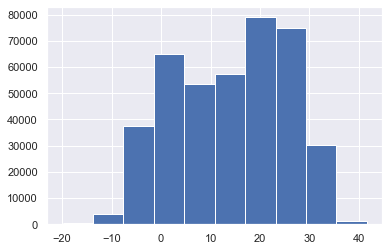

In [13]:
AirC_train['TEMP'].hist()

<AxesSubplot:>

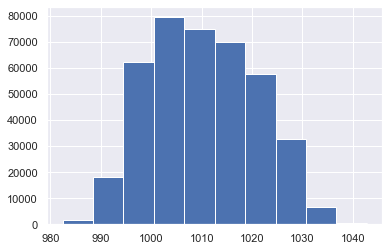

In [14]:
AirC_train['PRES'].hist()

<AxesSubplot:>

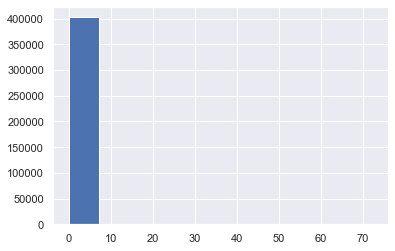

In [15]:
AirC_train['RAIN'].hist()

In [16]:
#7. understand dash, question mark or unique values etc Univariate/Features
AirC_train['wd'].unique() #to check dash, question mark etc


array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE',
       'WNW', 'SSE', 'ESE', 'S', 'SW', nan], dtype=object)

**Observation**
- nan values observed in categorical variable -to be grouped and filled with mode, if planned on using in model

In [17]:
#7. understand dash, question mark or unique values etc Univariate/Features
AirC_train['station'].unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

In [18]:
AirC_train['PM2.5'].groupby (AirC_train['station']).mean()

station
Aotizhongxin     82.260952
Changping        70.716012
Dingling         65.887825
Dongsi           85.465989
Guanyuan         82.515756
Gucheng          83.110626
Huairou          69.427838
Nongzhanguan     84.129369
Shunyi           78.802831
Tiantan          81.479200
Wanliu           82.920469
Wanshouxigong    84.086340
Name: PM2.5, dtype: float64

In [19]:
AirC_train['PM10'].groupby (AirC_train['station']).mean()

station
Aotizhongxin     110.176543
Changping         94.670447
Dingling          83.958074
Dongsi           109.430203
Guanyuan         108.685075
Gucheng          118.536530
Huairou           91.459723
Nongzhanguan     108.538013
Shunyi            98.379834
Tiantan          105.562703
Wanliu           110.445715
Wanshouxigong    111.780375
Name: PM10, dtype: float64

In [20]:
#8. understand Univariate/Features
AirC_train['wd'].value_counts()

NE     40049
ENE    33262
N      29973
NW     29587
E      29168
NNE    27247
SW     27083
NNW    24167
WNW    23815
ESE    23691
SSW    22130
WSW    19587
SE     19001
S      18999
SSE    17354
W      17274
Name: wd, dtype: int64

In [21]:
AirC_train['station'].value_counts()

Shunyi           33648
Guanyuan         33648
Wanliu           33648
Tiantan          33648
Dingling         33648
Gucheng          33648
Nongzhanguan     33648
Changping        33648
Huairou          33648
Aotizhongxin     33648
Wanshouxigong    33648
Dongsi           33648
Name: station, dtype: int64

**Observation**
- categorical variable station is having equal observations 
- categorical variable wd is not having equal observations as we can see most observations have a mix of **Northern & Eastern wind direction** while **Southern wind direction** observations are lower

<AxesSubplot:>

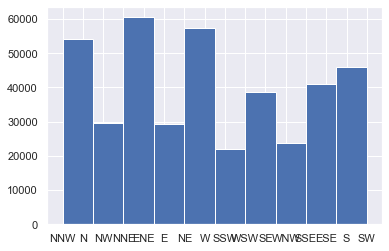

In [22]:
AirC_train['wd'].hist()

In [23]:
#sns.scatterplot(x=["TEMP"], y=["DEWP"],data=AirC_train)

In [24]:
#sns.scatterplot(x="PRES", y="TEMP",data=AirC_train)

In [25]:
#Checking for values in PM2.5 to understand all values and ranges
#AirC_train['PM2.5'].unique()

### Data cleansing and Data Preparation

In [26]:
#dropping off missing values in y variable PM2.5
AirC_train = AirC_train.dropna(axis=0,subset=['PM2.5'])

In [27]:
#dropping off 999 values in y variable PM2.5

#AirC_train = AirC_train.drop(axis=0,subset=['PM2.5'])

In [28]:
#dropping of Rain as most of the data is zeros
AirC_train.drop(['RAIN'], axis=1,inplace = True)
AirC_test.drop(['RAIN'], axis=1,inplace = True)

In [29]:
# Missing value treatment
AirC_train=(AirC_train.groupby('station').transform(lambda x: x.fillna(x.median())))

In [30]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      AirC_train.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
WSPM     0
dtype: int64


<AxesSubplot:>

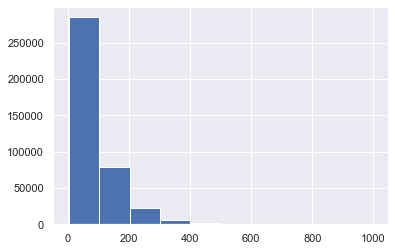

In [31]:
#10. LR Assumption, TV normally distributed & Feature Engineering
AirC_train['PM2.5'].hist()

**Observations**
- looks like highly positively skewed

C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


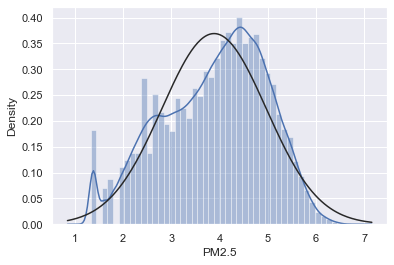

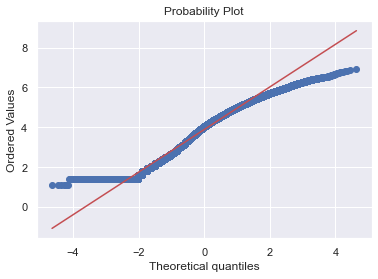

In [32]:
#11. TV should be normal , if not log transform and check
AirC_train['PM2.5']=np.log1p(AirC_train['PM2.5'])
sns.distplot(AirC_train['PM2.5'],fit=norm);
fig = plt.figure()
res = stats.probplot(AirC_train['PM2.5'],dist="norm", plot=plt)

<AxesSubplot:>

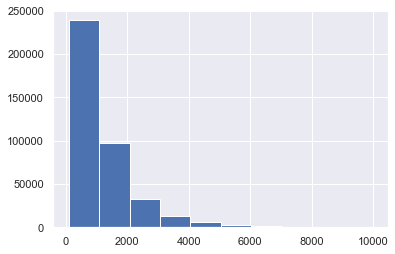

In [33]:
# checking explanatory variables 
AirC_train['CO'].hist()

**Observations**
-  positively skwed , hence log transforming CO

C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


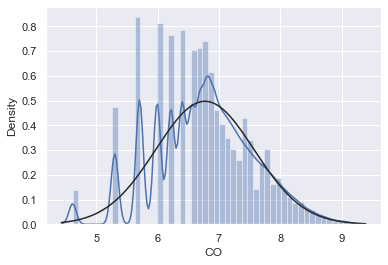

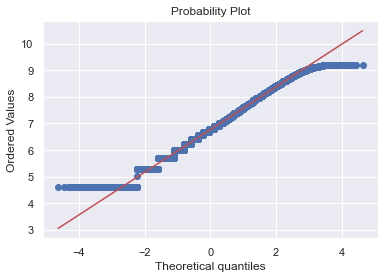

In [34]:
AirC_train['CO']=np.log1p(AirC_train['CO'])
sns.distplot(AirC_train['CO'],fit=norm);
fig = plt.figure()
res = stats.probplot(AirC_train['CO'],dist="norm", plot=plt)

<AxesSubplot:>

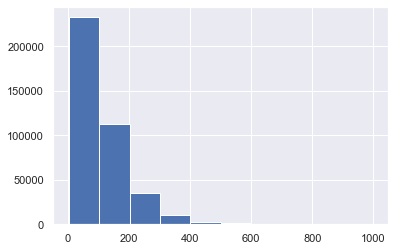

In [35]:
# checking explanatory variables & log transforming
AirC_train['PM10'].hist()

C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


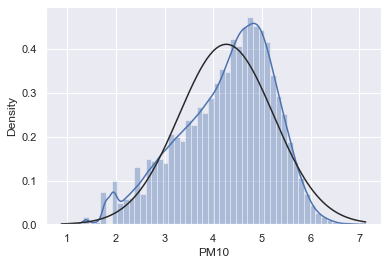

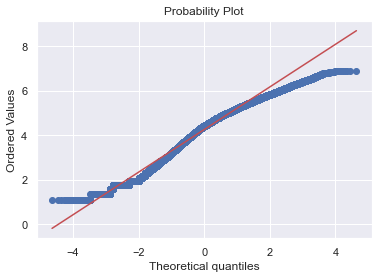

In [36]:
AirC_train['PM10']=np.log1p(AirC_train['PM10'])
sns.distplot(AirC_train['PM10'],fit=norm);
fig = plt.figure()
res = stats.probplot(AirC_train['PM10'],dist="norm", plot=plt)

<AxesSubplot:>

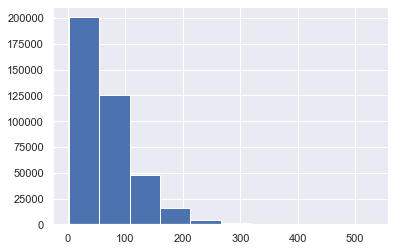

In [37]:
AirC_train['Dioxides'] = AirC_train['SO2'] + AirC_train['NO2']
AirC_train['Dioxides'].hist()

C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


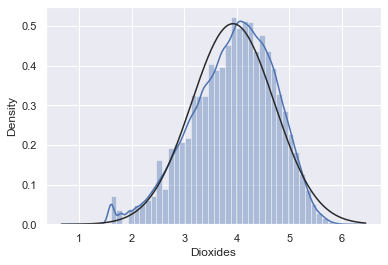

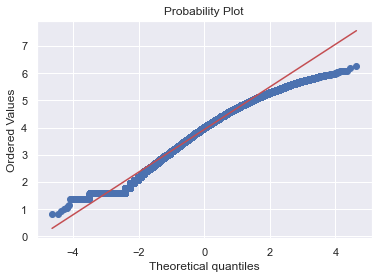

In [38]:

AirC_train['Dioxides'] = np.log1p(AirC_train['Dioxides'])
sns.distplot(AirC_train['Dioxides'],fit=norm);
fig = plt.figure()
res = stats.probplot(AirC_train['Dioxides'],dist="norm", plot=plt)


**Observations**
- log PM10 seems almost normal, log CO also normal
- New engineered feature log dioxides are almost normal

In [39]:
#Feature Engineering

#transformations , additions, multiplications, inverse relations etc for x variables
#AirC_train['PM2.5'] = np.log1p(AirC_train['PM2.5']) #log transform y variable
AirC_test['PM10']  = np.log1p(AirC_test['PM10'])
AirC_test['CO']   = np.log1p(AirC_test['CO'])
 #Vehicle emissions+Industrial coal burning etc
AirC_test['Dioxides'] = AirC_test['SO2'] + AirC_test['NO2'] 
AirC_test['Dioxides'] = np.log1p(AirC_test['Dioxides'])
#merging all time related variables to one feature
AirC_train['datetime'] = pd.to_datetime(AirC_train[['year', 'month','day', 'hour']])
AirC_test['datetime'] = pd.to_datetime(AirC_test[['year', 'month','day', 'hour']])

In [40]:
#Checking for features with new features
AirC_train.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM,Dioxides,datetime
REF_NO,,,,,,,,,,,,,,,,
1,2013,3,1,0,1.609438,1.609438,4.0,7.0,5.70711,77.0,-0.7,1023.0,-18.8,4.4,2.484907,2013-03-01 00:00:00
2,2013,3,1,1,2.197225,2.197225,4.0,7.0,5.70711,77.0,-1.1,1023.2,-18.2,4.7,2.484907,2013-03-01 01:00:00
3,2013,3,1,2,2.079442,2.079442,5.0,10.0,5.70711,73.0,-1.1,1023.5,-18.2,5.6,2.772589,2013-03-01 02:00:00
4,2013,3,1,3,1.945910,1.945910,11.0,11.0,5.70711,72.0,-1.4,1024.5,-19.4,3.1,3.135494,2013-03-01 03:00:00
5,2013,3,1,4,1.386294,1.386294,12.0,12.0,5.70711,72.0,-2.0,1025.2,-19.5,2.0,3.218876,2013-03-01 04:00:00


In [41]:
# dropping off all time related variables and original features enginered related to problem statement 
AirC_test = AirC_test.drop(['year', 'month','day', 'hour','datetime'], axis = 1)
AirC_train = AirC_train.drop(['year', 'month','day', 'hour','datetime'], axis = 1)
AirC_train.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM,Dioxides
REF_NO,,,,,,,,,,,
1,1.609438,1.609438,4.0,7.0,5.70711,77.0,-0.7,1023.0,-18.8,4.4,2.484907
2,2.197225,2.197225,4.0,7.0,5.70711,77.0,-1.1,1023.2,-18.2,4.7,2.484907
3,2.079442,2.079442,5.0,10.0,5.70711,73.0,-1.1,1023.5,-18.2,5.6,2.772589
4,1.945910,1.945910,11.0,11.0,5.70711,72.0,-1.4,1024.5,-19.4,3.1,3.135494
5,1.386294,1.386294,12.0,12.0,5.70711,72.0,-2.0,1025.2,-19.5,2.0,3.218876


In [42]:
#checking shape
print(AirC_train.shape)
print(AirC_test.shape)

(395301, 11)
(16728, 12)


In [43]:
#AirC_train.plot(figsize=(12,6))
#ax.set(title='Value of polluting gases for 5 years in China', ylabel='Value')

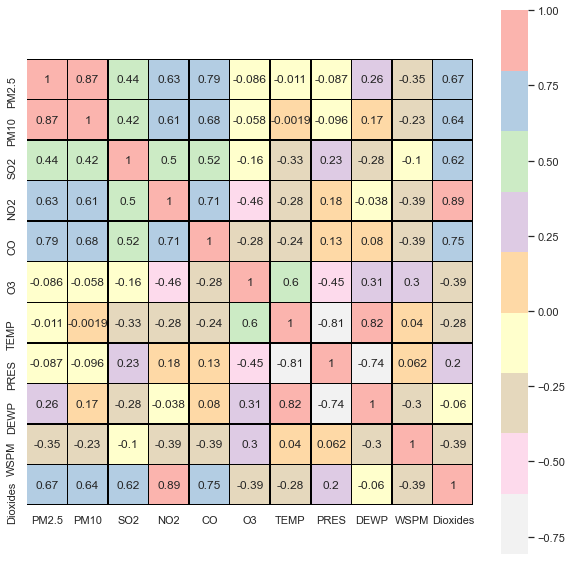

In [44]:
# Generate a heat map for train data before dropping few explanatory variables
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(AirC_train.corr(), annot=True,cmap='Pastel1_r',linewidths=0.5, linecolor='black',square=True, ax=ax );


<AxesSubplot:>

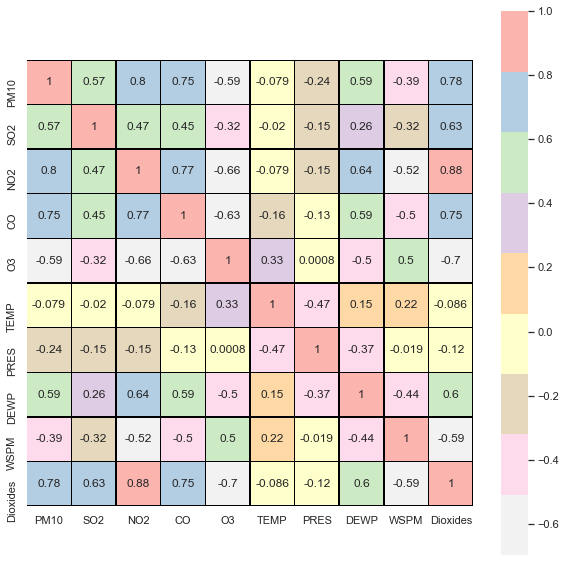

In [45]:
 # Generate a heat map for test data before dropping few explanatory variables
plt.figure(figsize=(10,10))
sns.heatmap(AirC_test.corr(),annot=True,cmap='Pastel1_r',linewidths=0.5, linecolor='black',square=True) 


In [46]:
#Dropping off few variables for model 1 based on chemistry understanding
#AirC_train = AirC_train.drop(['O3','TEMP', 'PRES','DEWP','WSPM'], axis = 1)
#AirC_test = AirC_test.drop(['O3','TEMP', 'PRES','DEWP','WSPM'], axis = 1)

In [47]:
#checking for skew after transformations
print(AirC_train.skew())
display(AirC_test.skew())

PM2.5      -0.329025
PM10       -0.523472
SO2         2.971064
NO2         1.064389
CO          0.008544
O3          1.668736
TEMP       -0.164569
PRES        0.149333
DEWP       -0.248134
WSPM        1.629423
Dioxides   -0.428574
dtype: float64


PM10       -0.086506
SO2         3.169759
NO2         0.845052
CO          0.039544
O3          0.852595
TEMP        0.566485
PRES       -0.419652
DEWP       -0.138297
WSPM        1.549774
Dioxides   -0.639975
dtype: float64

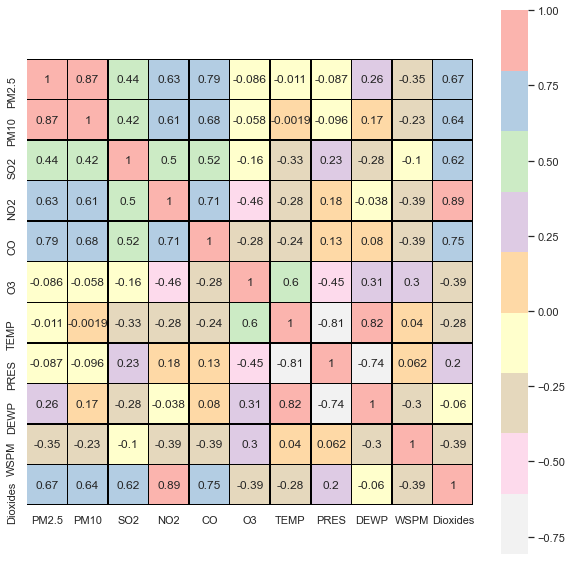

In [48]:
# Generate a heat map for train data
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(AirC_train.corr(), annot=True,cmap='Pastel1_r',linewidths=0.5, linecolor='black',square=True, ax=ax );


**Observations**
- since, log PM10, log CO and log Dioxides are all still having less than 0.8 correlation coefficient , decided to go with this set of explanatory variables

<AxesSubplot:>

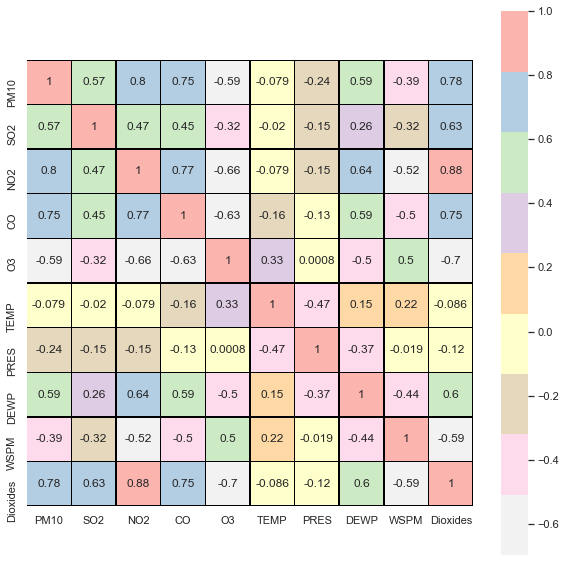

In [49]:
# 12. Check for Multicollinearity
plt.figure(figsize=(10,10))
sns.heatmap(AirC_test.corr(),annot=True,cmap='Pastel1_r',linewidths=0.5, linecolor='black',square=True) 



**Observations**

- PM10 seems to be highly correlated to PM2.5(r = 0.87, p < 0.05)
- CO was in good correlation with PM2.5 (r = 0.79, p < 0.05), implying that primarily emitted particles were an important contributor to the total PM2.5 and PM10
-  Dioxides were in good correlation with PM2.5 with a higher correlation coefficient (r = 0.67, p < 0.05) 
- however, originally SO2 was in weak correlation with PM2.5
- NO2 is due to vehicle emission was the major source of NO2 in the surrounding area and SO2 is mostly emitted from coal combustion and the elevated SO2 could also originate from regional transport as mentioned in problem statement(dioxides=SO2+NO2 feature engineering was carried out)
- As liquid droplets are contributing to PM2.5, water vapor is another factor which could influence this, so may be explored further  

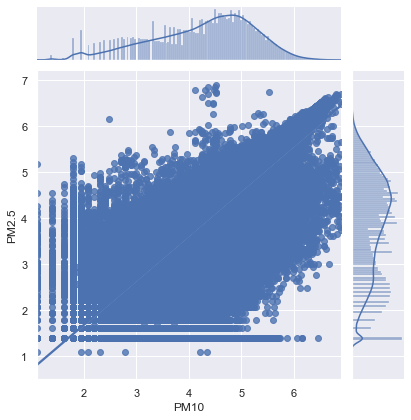

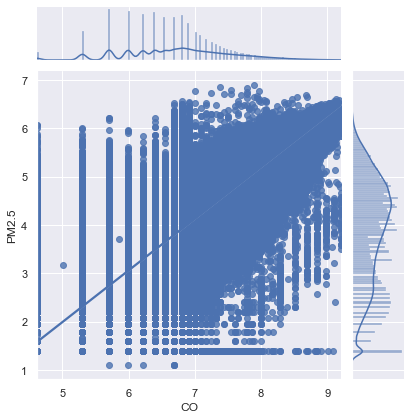

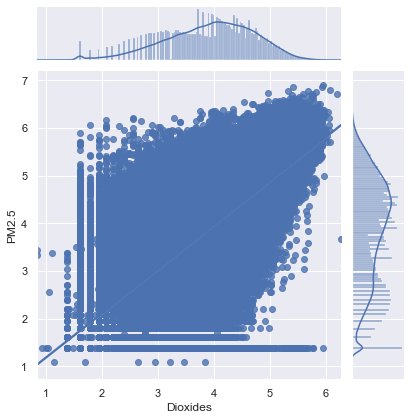

<Figure size 432x288 with 0 Axes>

In [50]:
#13. Check for Linearity
JG1 = sns.jointplot(x="PM10",y= "PM2.5", data=AirC_train, kind='reg')
JG2 = sns.jointplot(x="CO", y="PM2.5", data=AirC_train, kind='reg')
JG3 = sns.jointplot(x="Dioxides", y="PM2.5", data=AirC_train, kind='reg')

#subplots migration
f = plt.figure()
for J in [JG1, JG2,JG3]:
    for A in J.fig.axes:
        f._axstack

**observations**
- PM2.5 is highly correlated to PM10
- PM2.5 also correlated to CO

In [51]:
#we 1st create a copy of our dataframe and store the numerical feature names in a list, and their values as well:
feature_cols = ['PM10', 'CO', 'Dioxides','O3','TEMP', 'PRES','DEWP','WSPM' ]                # create a Python list of feature names
X = AirC_train [feature_cols] # use the list to select a subset of the original DataFrame
print(X.head())
y = AirC_train['PM2.5']
print(y.head())

            PM10       CO  Dioxides    O3  TEMP    PRES  DEWP  WSPM
REF_NO                                                             
1       1.609438  5.70711  2.484907  77.0  -0.7  1023.0 -18.8   4.4
2       2.197225  5.70711  2.484907  77.0  -1.1  1023.2 -18.2   4.7
3       2.079442  5.70711  2.772589  73.0  -1.1  1023.5 -18.2   5.6
4       1.945910  5.70711  3.135494  72.0  -1.4  1024.5 -19.4   3.1
5       1.386294  5.70711  3.218876  72.0  -2.0  1025.2 -19.5   2.0
REF_NO
1    1.609438
2    2.197225
3    2.079442
4    1.945910
5    1.386294
Name: PM2.5, dtype: float64


In [52]:
def lr():
    print(type(X))
    print(X.shape)
lr()

<class 'pandas.core.frame.DataFrame'>
(395301, 8)


In [53]:
def lr():
    print(type(y))
    print(y.shape)
lr()

<class 'pandas.core.series.Series'>
(395301,)


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y, test_size=0.25,random_state=1 )


In [55]:
X_test = AirC_test[feature_cols]
print(type(X_test))
print(X_test.shape)

<class 'pandas.core.frame.DataFrame'>
(16728, 8)


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform((X_train))
X_val=scaler.transform((X_val))
X_test=scaler.transform((X_test))

In [57]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [58]:
# this gives the coefficients of the 10 features selected above. 
print('Intercept:',regressor.intercept_)  
print('Coefficients', regressor.coef_)

Intercept: 0.1688660505073445
Coefficients [ 3.73879227  1.81260431  0.56339732  1.89219172 -1.04130744  0.061451
  1.51591725 -0.17668953]


In [59]:
train_pred = regressor.predict(X_train)
train_pred_org=np.exp(train_pred)
train_pred_df=pd.DataFrame(train_pred_org)
def lr():  
    train_pred_df.columns = ['PM2.5']
    head = train_pred_df.head()
    return head
lr()



,PM2.5
0,6.143805
1,34.191918
2,42.411188
3,66.173111
4,97.699078


In [60]:
val_pred = regressor.predict(X_val)
val_pred_org=np.exp(val_pred)
val_pred_df=pd.DataFrame(val_pred_org)
def lr():  
    val_pred_df.columns = ['PM2.5']
    head = val_pred_df.head()
    return head
lr()


,PM2.5
0,125.142039
1,71.954707
2,54.575278
3,136.006722
4,36.353956


In [61]:
test_pred = regressor.predict(X_test)
test_pred_org=np.exp(test_pred)
test_pred_df=pd.DataFrame(test_pred_org)
def lr():  
    test_pred_df.columns = ['PM2.5']
    head = test_pred_df.head()
    return head
lr()

,PM2.5
0,428.657555
1,434.034686
2,413.172532
3,379.679858
4,469.149113


In [62]:
y_train_org =np.exp(y_train) 
y_train_org

REF_NO
14942      5.0
15363     20.0
20738     53.0
18285      4.0
6235     121.0
         ...  
7858      88.0
9189      47.0
16536     12.0
4299      39.0
30170     37.0
Name: PM2.5, Length: 296475, dtype: float64

In [63]:
y_val_org =np.exp(y_val) 
y_val_org

REF_NO
9702     155.0
30308     37.0
2848      57.0
12906     84.0
14986     34.0
         ...  
20125     36.0
4217      18.0
7825      12.0
17652    170.0
28282     68.0
Name: PM2.5, Length: 98826, dtype: float64

In [64]:
AirC_test=AirC_test.drop(['SO2', 'NO2','wd', 'station'], axis=1)
print(AirC_test.head())
#beijing_test.set_index('REF_NO')
AirC_future_pred=pd.concat([AirC_test,test_pred_df.set_index(AirC_test.index)], axis=1)
AirC_future_pred

            PM10        CO    O3  TEMP    PRES  DEWP  WSPM  Dioxides
REF_NO                                                              
33649   6.208590  8.716208   4.0  -4.7  1022.1  -6.1   1.0  4.867534
33650   6.210600  8.748464   4.0  -5.2  1022.3  -6.4   0.7  4.795791
33651   6.152733  8.732466   4.0  -5.4  1022.5  -6.5   1.1  4.779123
33652   6.054439  8.682877   3.0  -5.2  1022.5  -6.2   1.1  4.753590
33653   6.150603  8.949105  16.0  -5.0  1021.9  -5.8   1.0  4.897840


,PM10,CO,O3,TEMP,PRES,DEWP,WSPM,Dioxides,PM2.5
REF_NO,,,,,,,,,
33649,6.208590,8.716208,4.0,-4.7,1022.1,-6.1,1.0,4.867534,428.657555
33650,6.210600,8.748464,4.0,-5.2,1022.3,-6.4,0.7,4.795791,434.034686
33651,6.152733,8.732466,4.0,-5.4,1022.5,-6.5,1.1,4.779123,413.172532
33652,6.054439,8.682877,3.0,-5.2,1022.5,-6.2,1.1,4.753590,379.679858
33653,6.150603,8.949105,16.0,-5.0,1021.9,-5.8,1.0,4.897840,469.149113
...,...,...,...,...,...,...,...,...,...
35060,3.496508,5.993961,72.0,12.5,1013.5,-16.2,2.4,3.332205,14.313807
35061,3.496508,6.216606,50.0,11.6,1013.6,-15.1,0.9,3.806662,16.797825
35062,3.367296,6.216606,54.0,10.8,1014.2,-13.3,1.1,3.761200,16.268422


In [65]:
AirC_future_pred.drop(['PM10', 'CO','O3', 'TEMP','DEWP','PRES','WSPM','Dioxides'], axis=1, inplace=True)
AirC_future_pred

,PM2.5
REF_NO,
33649,428.657555
33650,434.034686
33651,413.172532
33652,379.679858
33653,469.149113
...,...
35060,14.313807
35061,16.797825
35062,16.268422


In [66]:
AirC_future_pred.to_csv("submission_log_log.csv",index=True, header=False)

In [67]:
from sklearn import metrics

In [68]:
r2_train = metrics.r2_score(y_train_org,train_pred_org)
r2_val = metrics.r2_score(y_val_org,val_pred_org)

print("R2 score for training set is {}".format(r2_train))
print("R2 score for validation set is {}".format(r2_val))

R2 score for training set is 0.8479250103542877
R2 score for validation set is 0.8557250076732728


C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Values')

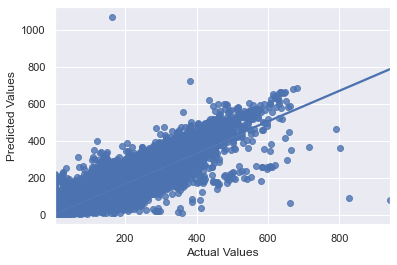

In [69]:
sns.regplot(y_val_org,val_pred_org)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [70]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
MSE_train = metrics.mean_squared_error(y_train_org, train_pred_org)
MSE_val = metrics.mean_squared_error(y_val_org, val_pred_org)
print(MSE_train)
print(MSE_val)

954.5945199590892
898.1567548697033


In [71]:
RMSE_train = MSE_train**0.5
RMSE_val = MSE_val**0.5
print(RMSE_train)
print(RMSE_val)

30.896513071204154
29.969263502290197



__y = 0.1688660505073445 + 3.73879227  * PM10 + 1.81260431  * CO + 0.56339732   * Dioxides + 1.89219172 * O3 -1.04130744 * TEMP + 0.061451 * PRES + 1.51591725  * DEWP -0.17668953 * WSPM__